In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load data
data = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

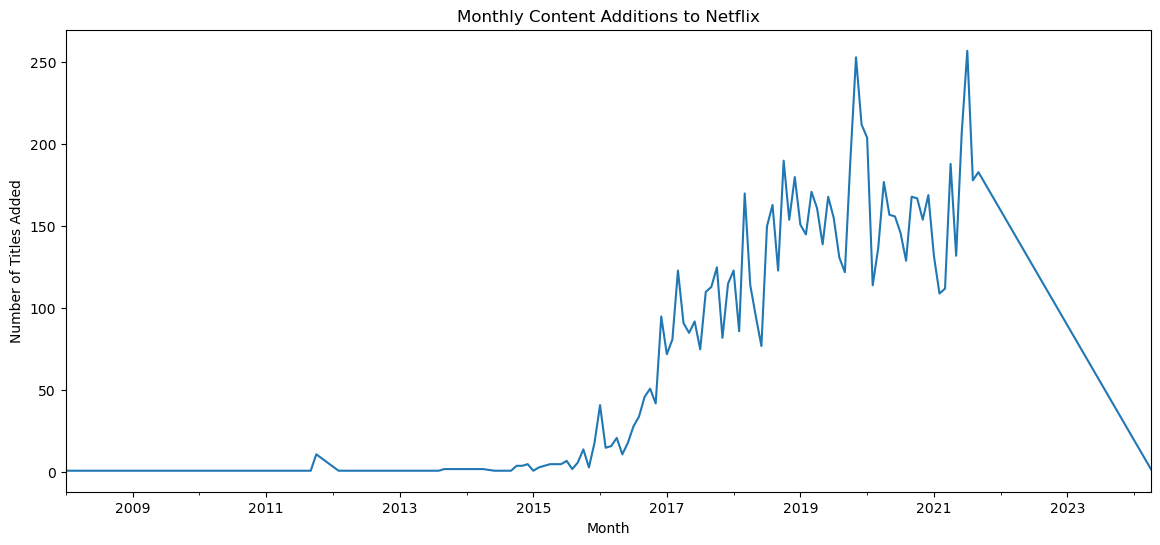

In [13]:
# 1. Time Series Analysis of Monthly Content Additions
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['month_year'] = data['date_added'].dt.to_period('M')
monthly_additions = data.groupby('month_year').size()
plt.figure(figsize=(14, 6))
monthly_additions.plot()
plt.title('Monthly Content Additions to Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.show()

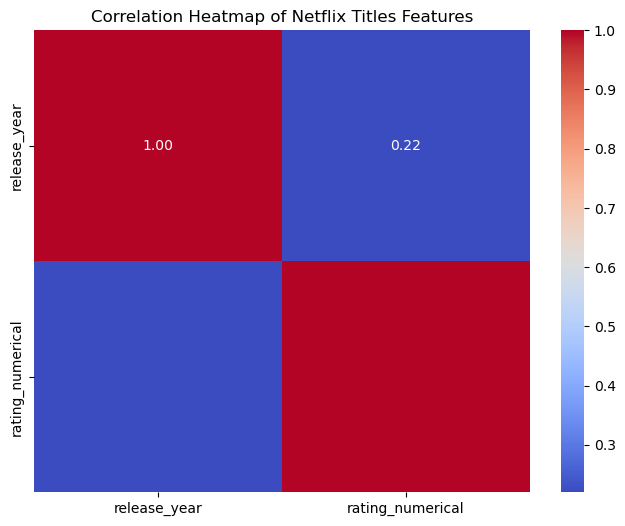

In [14]:
# 2. Correlation Heatmap of Numerical Features
# Convert ratings to a numerical scale if not already numeric
data['rating_numerical'] = data['rating'].map({'TV-MA': 18, 'TV-14': 14, 'TV-PG': 12, 'R': 17, 'PG-13': 13, 'NR': 0, 'G': 0, 'PG': 7})
corr = data[['release_year', 'rating_numerical']].dropna().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Netflix Titles Features')
plt.show()

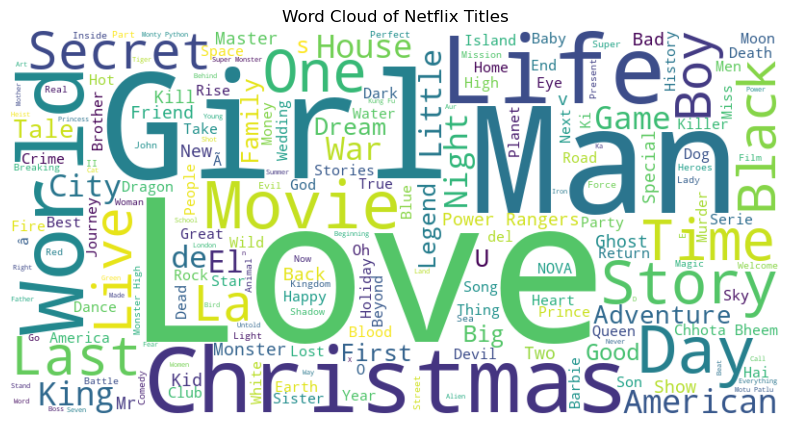

In [15]:
# 3. Word Cloud of Titles
titles = ' '.join(data['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()